In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from datetime import datetime
import warnings
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score


warnings.filterwarnings("ignore")
sns.set_theme(style="darkgrid")

# Teams

In [2]:
home= "Heidenheim"
away= "Leverkusen"

In [3]:
df_home= pd.read_csv(f"../Data/{home}.csv")
df_home["Date"] = pd.to_datetime(df_home["Date"]) 
df_home.tail()

,Team,Opp,Date,Result,H/A,GF,GA,GD,G-PK,PK,...,xAG,xA,G-xG,np:G-xG,A-xAG,npxG/Sh,FKAtt,PSxG,PSxG/SoT,PSxG+/-
22,Heidenheim,RB Leipzig,2025-02-23,D,A,2,2,0,1,1,...,0.1,0.5,1.2,0.9,0.9,0.02,0,2.6,0.30,0.6
23,Heidenheim,Gladbach,2025-03-01,L,H,0,3,-3,0,0,...,0.9,1.4,-1.6,-1.6,-0.9,0.08,1,1.8,0.36,-1.2
24,Heidenheim,Hoffenheim,2025-03-09,D,A,1,1,0,1,0,...,1.0,1.1,-0.2,-0.2,0.0,0.05,0,0.1,0.04,-0.9
25,Heidenheim,Holstein Kiel,2025-03-16,W,H,3,1,2,3,0,...,1.3,1.5,1.5,1.5,1.7,0.11,0,1.1,0.29,0.1
26,Heidenheim,Wolfsburg,2025-03-29,W,A,1,0,1,0,1,...,0.5,0.9,-0.3,-0.6,-0.5,0.06,0,0.3,0.15,0.3


In [4]:
df_vs_home= pd.read_csv(f"../Data/vs {home}.csv")
df_vs_home["Date"] = pd.to_datetime(df_vs_home["Date"]) 
df_vs_home.tail()

,Team,Opp,Date,Result,H/A,GF,GA,GD,G-PK,PK,...,xAG,xA,G-xG,np:G-xG,A-xAG,npxG/Sh,FKAtt,PSxG,PSxG/SoT,PSxG+/-
22,RB Leipzig,Heidenheim,2025-02-23,D,H,2,2,0,1,1,...,0.9,1.3,0.1,-0.1,0.1,0.07,0,1.1,0.18,-0.9
23,Gladbach,Heidenheim,2025-03-01,W,A,3,0,3,3,0,...,1.7,0.8,1.2,1.2,1.3,0.14,0,0.3,0.08,0.3
24,Hoffenheim,Heidenheim,2025-03-09,D,H,1,1,0,1,0,...,1.3,1.2,-0.3,-0.3,-0.3,0.08,0,1.6,0.31,0.6
25,Holstein Kiel,Heidenheim,2025-03-16,L,A,1,3,-2,1,0,...,0.7,1.2,-0.5,-0.5,0.3,0.10,1,1.5,0.32,-1.5
26,Wolfsburg,Heidenheim,2025-03-29,L,H,0,1,-1,0,0,...,1.3,1.7,-1.3,-1.3,-1.3,0.12,1,1.3,0.14,0.3


In [5]:
df_away= pd.read_csv(f"../Data/{away}.csv")
df_away["Date"] = pd.to_datetime(df_away["Date"]) 
df_away.tail()

,Team,Opp,Date,Result,H/A,GF,GA,GD,G-PK,PK,...,xAG,xA,G-xG,np:G-xG,A-xAG,npxG/Sh,FKAtt,PSxG,PSxG/SoT,PSxG+/-
22,Leverkusen,Holstein Kiel,2025-02-22,W,A,2,0,2,2,0,...,1.3,1.7,0.2,0.2,-0.3,0.10,1,0.7,0.23,0.7
23,Leverkusen,Eint Frankfurt,2025-03-01,W,A,4,1,3,4,0,...,1.6,1.3,2.0,2.0,0.4,0.12,0,1.2,0.40,0.2
24,Leverkusen,Werder Bremen,2025-03-08,L,H,0,2,-2,0,0,...,1.4,2.0,-1.6,-1.6,-1.4,0.09,1,1.3,0.19,-0.7
25,Leverkusen,Stuttgart,2025-03-16,W,A,4,3,1,3,0,...,1.5,1.5,1.3,1.3,0.5,0.11,0,2.2,0.38,0.2
26,Leverkusen,Bochum,2025-03-28,W,H,3,1,2,3,0,...,1.9,1.7,1.0,1.0,1.1,0.14,0,0.3,0.12,-0.7


In [6]:
df_vs_away= pd.read_csv(f"../Data/vs {away}.csv")
df_vs_away["Date"] = pd.to_datetime(df_away["Date"]) 
df_vs_away.tail()

,Team,Opp,Date,Result,H/A,GF,GA,GD,G-PK,PK,...,xAG,xA,G-xG,np:G-xG,A-xAG,npxG/Sh,FKAtt,PSxG,PSxG/SoT,PSxG+/-
22,Holstein Kiel,Leverkusen,2025-02-22,L,H,0,2,-2,0,0,...,0.3,0.4,-0.3,-0.3,-0.3,0.08,0,3.2,0.45,1.2
23,Eint Frankfurt,Leverkusen,2025-03-01,L,H,1,4,-3,1,0,...,0.3,0.2,-0.1,-0.1,-0.3,0.16,0,3.1,0.36,-0.9
24,Werder Bremen,Leverkusen,2025-03-08,W,A,2,0,2,2,0,...,0.9,0.8,0.9,0.9,1.1,0.10,1,1.6,0.40,1.6
25,Stuttgart,Leverkusen,2025-03-16,L,H,3,4,-1,2,0,...,1.7,1.3,-0.3,-0.3,0.3,0.23,0,1.6,0.39,-1.4
26,Bochum,Leverkusen,2025-03-28,L,A,1,3,-2,1,0,...,0.2,0.7,0.5,0.5,0.8,0.06,0,1.5,0.30,-1.5


In [7]:
print(list(df_away.columns))

['Team', 'Opp', 'Date', 'Result', 'H/A', 'GF', 'GA', 'GD', 'G-PK', 'PK', 'PKatt', 'PKm', 'Poss', 'Att (GK)', 'Thr', 'Pa Launch%', 'Pa AvgLen', 'Won', 'Lost', 'Won%', 'Att To', 'Succ', 'Succ%', 'Tkld', 'Tkld%', 'Carries', 'TotDist', 'PrgDist', 'PrgC', 'Last3rd Car', 'OppCr', 'Stp', 'Stp%', 'CrdY', 'CrdR', '2CrdY', 'Fls', 'Fld', 'GCA', 'PassLive Gc', 'PassDead Gc', 'TO Gc', 'Sh-Gc', 'Fld Gc', 'Def-Gc', 'GK Att', 'Launch%', 'AvgLen', 'Sh', 'G/Sh', 'G/SoT', 'SoT', 'SoT%', 'Dist', 'FK', 'Off', 'PKwon', 'PKcon', 'OG', 'Recov', '#OPA', 'AvgDist', 'Cmp', 'Pas Att', 'Cmp%', 'KP', 'Last3rd PA', 'PPA', 'CrsPA', 'PrgP', 'TotDist Pas', 'PrgDist Pas', 'Cmp 5-15', 'Att 5-15', 'Cmp% 5-15', 'Cmp 15-30', 'Att 15-30', 'Cmp% 15-30', 'Cmp 30+', 'Att 30+', 'Cmp% 30+', 'PKdef', 'PKA', 'PKms', 'Missed PK%', 'PKAg', 'PKsv', 'PK Save%', 'FK Ag', 'CKG', 'OGK', 'Live Pas', 'Dead', 'Pas FK', 'TB', 'Sw', 'Crs', 'TI', 'CK', 'In', 'Out', 'Str', 'Ps Off', 'PTo', 'Rec', 'Last3rd Rec', 'CPA', 'Mis', 'Dis', 'SCA', 'PassL

# Desc

# Features

## Offense

In [8]:
offense= ['G-PK', 'PK', 'PKm', 'Poss', 'PKatt', 'Att To', 'Succ', 'Succ%', 'Tkld', 'Tkld%', 'Carries', 'TotDist', 'PrgDist', 
          'PrgC', 'Last3rd Car', 'GCA', 'PassLive Gc', 'PassDead Gc', 'TO Gc', 'Sh-Gc', 'Fld Gc', 'Def-Gc', 'Sh', 'G/Sh', 
          'G/SoT', 'SoT', 'SoT%', 'Dist', 'FK', 'Off', 'PKwon', 'Cmp', 'Pas Att', 'Cmp%', 'KP', 'Last3rd PA', 'PPA', 'CrsPA', 
          'PrgP', 'TotDist Pas', 'PrgDist Pas', 'Cmp 5-15', 'Att 5-15', 'Cmp% 5-15', 'Cmp 15-30', 'Att 15-30', 'Cmp% 15-30', 
          'Cmp 30+', 'Att 30+', 'Cmp% 30+', 'Live Pas', 'Dead', 'Pas FK', 'TB', 'Sw', 'Crs', 'TI', 'CK', 'In', 'Out', 'Str', 
          'Ps Off', 'PTo', 'Rec', 'Last3rd Rec', 'CPA', 'Mis', 'Dis', 'SCA', 'PassLive Sc', 'PassDead Sc', 'TO Sc', 'Sh-Sh', 
          'Fld Sc', 'Def-Sc', 'Touches', 'Def Pen', 'Tch Def 3rd', 'Tch Mid 3rd', 'Tch Att 3rd', 'Att Pen', 'Live Tch', 'xG', 
          'npxG', 'xGD', 'npxGD', 'xAG', 'xA', 'G-xG', 'np:G-xG', 'A-xAG', 'npxG/Sh', 'FKAtt', 'GF']

In [9]:
df_home_off= df_home[offense]
df_home_off.tail()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,xGD,npxGD,xAG,xA,G-xG,np:G-xG,A-xAG,npxG/Sh,FKAtt,GF
22,1,1,0,26,1,9,1,11.1,8,88.9,...,-1.0,-1.0,0.1,0.5,1.2,0.9,0.9,0.02,0,2
23,0,0,0,45,0,10,6,60.0,3,30.0,...,-0.2,-0.2,0.9,1.4,-1.6,-1.6,-0.9,0.08,1,0
24,1,0,0,45,0,12,8,66.7,3,25.0,...,-0.1,-0.1,1.0,1.1,-0.2,-0.2,0.0,0.05,0,1
25,3,0,0,39,0,15,7,46.7,5,33.3,...,0.0,0.0,1.3,1.5,1.5,1.5,1.7,0.11,0,3
26,0,1,0,39,1,18,8,44.4,7,38.9,...,0.1,-0.7,0.5,0.9,-0.3,-0.6,-0.5,0.06,0,1


In [10]:
df_vs_home_off= df_vs_home[offense]
df_vs_home_off.tail()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,xGD,npxGD,xAG,xA,G-xG,np:G-xG,A-xAG,npxG/Sh,FKAtt,GF
22,1,1,0,74,1,26,12,46.2,12,46.2,...,1.0,1.0,0.9,1.3,0.1,-0.1,0.1,0.07,0,2
23,3,0,0,55,0,13,6,46.2,6,46.2,...,0.2,0.2,1.7,0.8,1.2,1.2,1.3,0.14,0,3
24,1,0,0,55,0,17,10,58.8,6,35.3,...,0.1,0.1,1.3,1.2,-0.3,-0.3,-0.3,0.08,0,1
25,1,0,0,61,0,25,10,40.0,12,48.0,...,0.0,0.0,0.7,1.2,-0.5,-0.5,0.3,0.10,1,1
26,0,0,0,61,0,13,3,23.1,7,53.8,...,-0.1,0.7,1.3,1.7,-1.3,-1.3,-1.3,0.12,1,0


In [11]:
df_away_off= df_away[offense]
df_away_off.tail()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,xGD,npxGD,xAG,xA,G-xG,np:G-xG,A-xAG,npxG/Sh,FKAtt,GF
22,2,0,0,62,0,11,4,36.4,5,45.5,...,1.5,1.5,1.3,1.7,0.2,0.2,-0.3,0.10,1,2
23,4,0,0,59,0,22,12,54.5,10,45.5,...,0.9,0.9,1.6,1.3,2.0,2.0,0.4,0.12,0,4
24,0,0,0,72,0,15,6,40.0,8,53.3,...,0.5,0.5,1.4,2.0,-1.6,-1.6,-1.4,0.09,1,0
25,3,0,0,57,0,18,4,22.2,12,66.7,...,-0.6,-0.6,1.5,1.5,1.3,1.3,0.5,0.11,0,4
26,3,0,0,66,0,25,11,44.0,13,52.0,...,1.5,1.5,1.9,1.7,1.0,1.0,1.1,0.14,0,3


In [12]:
df_vs_away_off= df_vs_away[offense]
df_vs_away_off.tail()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,xGD,npxGD,xAG,xA,G-xG,np:G-xG,A-xAG,npxG/Sh,FKAtt,GF
22,0,0,0,38,0,10,8,80.0,2,20.0,...,-1.5,-1.5,0.3,0.4,-0.3,-0.3,-0.3,0.08,0,0
23,1,0,0,41,0,10,6,60.0,4,40.0,...,-0.9,-0.9,0.3,0.2,-0.1,-0.1,-0.3,0.16,0,1
24,2,0,0,28,0,12,5,41.7,6,50.0,...,-0.5,-0.5,0.9,0.8,0.9,0.9,1.1,0.10,1,2
25,2,0,0,43,0,11,4,36.4,6,54.5,...,0.6,0.6,1.7,1.3,-0.3,-0.3,0.3,0.23,0,3
26,1,0,0,34,0,6,1,16.7,5,83.3,...,-1.5,-1.5,0.2,0.7,0.5,0.5,0.8,0.06,0,1


## Defence

In [13]:
defence= ['OppCr', 'Stp', 'Stp%', 'PKcon', '#OPA', 'AvgDist', 'PKsv', 'PK Save%', 'FK Ag', 'CKG', 'OGK', 'SoTA', 'Saves', 
          'Save%', 'Tkl', 'TklW', 'Tkl Def 3rd', 'Tkl Mid 3rd', 'Tkl Att 3rd', 'Tkl.2', 'Tkl Att', 'Tkl%', 'Lost Tkl', 
          'Ints', 'BlcSh', 'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err',  'PSxG', 'PSxG/SoT', 'PSxG+/-', 'GA']

In [14]:
df_home_def= df_home[defence]
df_home_def.tail()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,BlcSh,Pass,Int,Tkl+Int,Clr,Err,PSxG,PSxG/SoT,PSxG+/-,GA
22,29,3,10.3,1,0,11.1,0,0.0,0,0,...,7,13,11,32,53,0,2.6,0.30,0.6,2
23,13,0,0.0,0,0,7.3,0,NaN,0,0,...,2,6,13,22,12,1,1.8,0.36,-1.2,3
24,22,0,0.0,0,0,17.0,0,NaN,0,0,...,5,12,5,22,48,0,0.1,0.04,-0.9,1
25,16,1,6.3,0,1,11.3,0,NaN,0,0,...,6,5,8,32,34,3,1.1,0.29,0.1,1
26,17,2,11.8,0,1,10.4,0,NaN,0,0,...,2,11,11,27,27,0,0.3,0.15,0.3,0


In [15]:
df_vs_home_def= df_vs_home[defence]
df_vs_home_def.tail()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,BlcSh,Pass,Int,Tkl+Int,Clr,Err,PSxG,PSxG/SoT,PSxG+/-,GA
22,10,2,20.0,1,2,20.5,0,0.0,0,0,...,0,5,7,19,21,0,1.1,0.18,-0.9,2
23,19,1,5.3,0,0,6.8,0,NaN,0,0,...,12,8,7,15,36,2,0.3,0.08,0.3,0
24,12,0,0.0,0,0,8.8,0,NaN,0,0,...,5,11,6,13,28,1,1.6,0.31,0.6,1
25,11,0,0.0,0,5,18.3,0,NaN,0,0,...,3,10,11,24,21,0,1.5,0.32,-1.5,3
26,10,1,10.0,1,2,15.6,0,0.0,0,0,...,1,6,10,19,20,0,1.3,0.14,0.3,1


In [16]:
df_away_def= df_away[defence]
df_away_def.head()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,BlcSh,Pass,Int,Tkl+Int,Clr,Err,PSxG,PSxG/SoT,PSxG+/-,GA
0,12,1,8.3,0,0,12.0,0,NaN,0,0,...,5,6,4,17,16,0,2.3,0.36,0.3,2
1,6,0,0.0,0,3,20.2,0,NaN,0,0,...,1,4,8,24,9,0,1.3,0.33,-1.7,3
2,12,1,8.3,0,0,10.5,0,NaN,0,0,...,5,5,4,17,20,0,0.6,0.13,-0.4,1
3,6,0,0.0,0,4,27.8,0,NaN,0,1,...,0,5,9,24,11,3,0.8,0.21,-1.2,3
4,13,1,7.7,0,0,4.3,0,NaN,0,0,...,4,13,9,23,18,0,0.5,0.18,-0.5,1


In [17]:
df_vs_away_def= df_vs_away[defence]
df_vs_away_def.head()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,BlcSh,Pass,Int,Tkl+Int,Clr,Err,PSxG,PSxG/SoT,PSxG+/-,GA
0,16,0,0.0,1,0,13.5,1,100.0,0,0,...,7,7,16,36,30,1,2.3,0.14,-0.7,3
1,25,0,0.0,0,0,6.8,0,NaN,0,0,...,7,13,14,39,38,2,1.6,0.16,-0.4,2
2,18,0,0.0,1,2,19.5,0,0.0,0,0,...,7,8,6,32,26,0,4.6,0.52,0.6,4
3,20,0,0.0,0,0,12.5,0,NaN,0,3,...,6,7,13,25,30,0,3.1,0.44,-0.9,4
4,3,0,0.0,0,3,29.7,0,NaN,0,1,...,0,7,12,27,2,1,0.5,0.24,-0.5,1


## Combined

In [18]:
combined= ['Won', 'Lost', 'Won%', 'CrdY', 'CrdR', '2CrdY', 'Fls', 'Fld', 'Recov']

In [19]:
df_home_cmb= df_home[combined]
df_home_cmb.tail()

,Won,Lost,Won%,CrdY,CrdR,2CrdY,Fls,Fld,Recov
22,19,15,55.9,3,0,0,15,13,26
23,10,17,37.0,2,0,0,9,15,34
24,19,34,35.8,3,0,0,11,7,42
25,26,15,63.4,1,0,0,15,13,34
26,19,21,47.5,4,0,0,10,7,43


In [20]:
df_vs_home_cmb= df_vs_home[combined]
df_vs_home_cmb.tail()

,Won,Lost,Won%,CrdY,CrdR,2CrdY,Fls,Fld,Recov
22,15,19,44.1,3,0,0,15,15,34
23,17,10,63.0,3,0,0,15,8,43
24,34,19,64.2,2,0,0,9,9,45
25,15,26,36.6,3,0,0,13,15,42
26,21,19,52.5,2,0,0,8,9,54


In [21]:
df_away_cmb= df_away[combined]
df_away_cmb.tail()

,Won,Lost,Won%,CrdY,CrdR,2CrdY,Fls,Fld,Recov
22,23,15,60.5,1,0,0,10,11,53
23,7,10,41.2,1,0,0,7,9,56
24,16,13,55.2,4,0,0,12,10,38
25,15,24,38.5,2,0,0,14,13,47
26,9,13,40.9,0,0,0,6,12,43


In [22]:
df_vs_away_cmb= df_vs_away[combined]
df_vs_away_cmb.tail()

,Won,Lost,Won%,CrdY,CrdR,2CrdY,Fls,Fld,Recov
22,15,23,39.5,4,0,0,11,10,38
23,10,7,58.8,1,0,0,9,7,40
24,13,16,44.8,4,0,0,10,12,31
25,24,15,61.5,3,0,0,13,13,45
26,13,9,59.1,1,0,0,13,6,41


## By Team

In [23]:
def create_lagged_features(df, target_cols, window= 4):
    """
    Creates lagged and rolling window features for a given dataset.
    
    Parameters:
    df (pd.DataFrame): The input dataframe containing game-by-game data.
    team_col (str): The column name representing the team.
    date_col (str): The column name representing the game date.
    target_cols (list): List of columns to create lagged and rolling features for.
    opponent_col (str, optional): Column representing the opponent team (if applicable).
    lags (list): List of lag periods to include.
    rolling_windows (list): List of rolling window sizes for moving averages and std dev.
    
    Returns:
    pd.DataFrame: Dataframe with additional lagged and rolling features.
    """
    df = df.copy()
    
    
    # Create lagged features for the given columns
    #for col in target_cols:
     #   for lag in range(1, window+1):
      #      df[f'{col}_lag_{lag}'] = df[col].shift(lag)
    
    # Create rolling window features (mean & std)
    for col in target_cols:
        df[f'{col}_rolling_avg_{window}'] = df[col].shift(1).rolling(window, min_periods= 1).mean()
        df[f'{col}_rolling_std_{window}'] = df[col].shift(1).rolling(window, min_periods= 1).std()
    
    # Fill NA values (after shifting to avoid data leakage)
    df = df.fillna(0)
    
    return df


In [24]:
df_home_off= create_lagged_features(df_home_off, offense)
df_home_off.tail()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,np:G-xG_rolling_avg_4,np:G-xG_rolling_std_4,A-xAG_rolling_avg_4,A-xAG_rolling_std_4,npxG/Sh_rolling_avg_4,npxG/Sh_rolling_std_4,FKAtt_rolling_avg_4,FKAtt_rolling_std_4,GF_rolling_avg_4,GF_rolling_std_4
22,1,1,0,26,1,9,1,11.1,8,88.9,...,-0.225,0.450000,-0.100,0.496655,0.0650,0.030000,0.00,0.0,0.50,0.577350
23,0,0,0,45,0,10,6,60.0,3,30.0,...,0.050,0.723418,0.150,0.704746,0.0425,0.015000,0.00,0.0,0.75,0.957427
24,1,0,0,45,0,12,8,66.7,3,25.0,...,-0.450,1.027943,-0.225,0.780491,0.0500,0.024495,0.25,0.5,0.50,1.000000
25,3,0,0,39,0,15,7,46.7,5,33.3,...,-0.375,1.034005,-0.125,0.776209,0.0500,0.024495,0.25,0.5,0.75,0.957427
26,0,1,0,39,1,18,8,44.4,7,38.9,...,0.150,1.362596,0.425,1.123610,0.0650,0.038730,0.25,0.5,1.50,1.290994


In [25]:
df_vs_home_off= create_lagged_features(df_vs_home_off, offense)
df_vs_home_off.tail()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,np:G-xG_rolling_avg_4,np:G-xG_rolling_std_4,A-xAG_rolling_avg_4,A-xAG_rolling_std_4,npxG/Sh_rolling_avg_4,npxG/Sh_rolling_std_4,FKAtt_rolling_avg_4,FKAtt_rolling_std_4,GF_rolling_avg_4,GF_rolling_std_4
22,1,1,0,74,1,26,12,46.2,12,46.2,...,0.175,0.492443,0.150,0.519615,0.1750,0.112101,0.00,0.0,1.75,0.500000
23,3,0,0,55,0,13,6,46.2,6,46.2,...,-0.075,0.095743,-0.050,0.173205,0.1675,0.119548,0.00,0.0,1.75,0.500000
24,1,0,0,55,0,17,10,58.8,6,35.3,...,0.275,0.618466,0.350,0.635085,0.1650,0.120139,0.00,0.0,2.00,0.816497
25,1,0,0,61,0,25,10,40.0,12,48.0,...,0.200,0.678233,0.275,0.704154,0.1575,0.125532,0.00,0.0,2.00,0.816497
26,0,0,0,61,0,13,3,23.1,7,53.8,...,0.075,0.767572,0.350,0.680686,0.0975,0.030957,0.25,0.5,1.75,0.957427


In [26]:
df_away_def= create_lagged_features(df_away_def, defence)
df_away_def.tail()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,Err_rolling_avg_4,Err_rolling_std_4,PSxG_rolling_avg_4,PSxG_rolling_std_4,PSxG/SoT_rolling_avg_4,PSxG/SoT_rolling_std_4,PSxG+/-_rolling_avg_4,PSxG+/-_rolling_std_4,GA_rolling_avg_4,GA_rolling_std_4
22,9,1,11.1,0,2,21.8,0,0.0,0,0,...,0.25,0.500000,0.925,0.830161,0.220000,0.081854,0.425,0.675154,0.75,0.957427
23,2,0,0.0,0,1,40.5,0,0.0,0,0,...,0.00,0.000000,0.925,0.830161,0.216667,0.080829,0.675,0.471699,0.25,0.500000
24,6,1,16.7,0,3,18.2,0,0.0,0,0,...,0.50,1.000000,0.725,0.525198,0.253333,0.136504,0.475,0.457347,0.25,0.500000
25,7,0,0.0,0,1,34.0,0,0.0,0,0,...,0.75,0.957427,0.800,0.594418,0.273333,0.111505,0.050,0.580230,0.75,0.957427
26,8,0,0.0,0,0,13.0,0,0.0,0,0,...,0.75,0.957427,1.350,0.624500,0.300000,0.105515,0.100,0.583095,1.50,1.290994


In [27]:
df_vs_away_def= create_lagged_features(df_vs_away_def, defence)
df_vs_away_def.tail()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,Err_rolling_avg_4,Err_rolling_std_4,PSxG_rolling_avg_4,PSxG_rolling_std_4,PSxG/SoT_rolling_avg_4,PSxG/SoT_rolling_std_4,PSxG+/-_rolling_avg_4,PSxG+/-_rolling_std_4,GA_rolling_avg_4,GA_rolling_std_4
22,31,0,0.0,0,0,5.2,0,0.0,0,0,...,0.50,0.57735,1.375,0.956992,0.4025,0.081803,0.125,0.694622,1.25,1.500000
23,11,0,0.0,0,0,0.0,0,0.0,0,1,...,0.50,0.57735,1.600,1.293574,0.4200,0.082865,0.350,0.888819,1.25,1.500000
24,28,3,10.7,0,0,4.5,0,0.0,0,0,...,0.50,0.57735,1.850,1.502221,0.4000,0.086023,0.350,0.888819,1.50,1.914854
25,26,0,0.0,0,0,1.0,0,0.0,0,1,...,0.50,0.57735,2.125,1.252664,0.3775,0.063443,0.625,1.096586,1.50,1.914854
26,17,0,0.0,0,3,16.6,0,0.0,0,0,...,0.25,0.50000,2.375,0.895824,0.4000,0.037417,0.125,1.495270,2.50,1.914854


In [28]:
df_away_off= create_lagged_features(df_away_off, offense)
df_away_off.tail()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,np:G-xG_rolling_avg_4,np:G-xG_rolling_std_4,A-xAG_rolling_avg_4,A-xAG_rolling_std_4,npxG/Sh_rolling_avg_4,npxG/Sh_rolling_std_4,FKAtt_rolling_avg_4,FKAtt_rolling_std_4,GF_rolling_avg_4,GF_rolling_std_4
22,2,0,0,62,0,11,4,36.4,5,45.5,...,-0.550,1.577973,-0.500,0.959166,0.1525,0.045735,0.00,0.00000,1.25,1.500000
23,4,0,0,59,0,22,12,54.5,10,45.5,...,-0.400,1.624808,-0.475,0.963933,0.1250,0.030000,0.25,0.50000,1.25,1.500000
24,0,0,0,72,0,15,6,40.0,8,53.3,...,-0.300,1.792577,-0.575,0.793200,0.1150,0.019149,0.25,0.50000,1.50,1.914854
25,3,0,0,57,0,18,4,22.2,12,66.7,...,-0.350,1.835756,-0.575,0.793200,0.1125,0.022174,0.50,0.57735,1.50,1.914854
26,3,0,0,66,0,25,11,44.0,13,52.0,...,0.475,1.569235,-0.200,0.875595,0.1050,0.012910,0.50,0.57735,2.50,1.914854


In [29]:
df_vs_away_off= create_lagged_features(df_vs_away_off, offense)
df_vs_away_off.tail()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,np:G-xG_rolling_avg_4,np:G-xG_rolling_std_4,A-xAG_rolling_avg_4,A-xAG_rolling_std_4,npxG/Sh_rolling_avg_4,npxG/Sh_rolling_std_4,FKAtt_rolling_avg_4,FKAtt_rolling_std_4,GF_rolling_avg_4,GF_rolling_std_4
22,0,0,0,38,0,10,8,80.0,2,20.0,...,-0.325,0.567891,-0.575,0.537742,0.0800,0.057155,0.75,0.50000,0.75,0.957427
23,1,0,0,41,0,10,6,60.0,4,40.0,...,-0.475,0.403113,-0.525,0.556028,0.0750,0.055678,0.50,0.57735,0.25,0.500000
24,2,0,0,28,0,12,5,41.7,6,50.0,...,-0.275,0.309570,-0.275,0.206155,0.0775,0.060208,0.25,0.50000,0.25,0.500000
25,2,0,0,43,0,11,4,36.4,6,54.5,...,0.125,0.531507,0.125,0.665207,0.0900,0.057735,0.25,0.50000,0.75,0.957427
26,1,0,0,34,0,6,1,16.7,5,83.3,...,0.050,0.574456,0.200,0.663325,0.1425,0.067515,0.25,0.50000,1.50,1.290994


In [30]:
df_home_def= create_lagged_features(df_home_def, defence)
df_home_def.tail()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,Err_rolling_avg_4,Err_rolling_std_4,PSxG_rolling_avg_4,PSxG_rolling_std_4,PSxG/SoT_rolling_avg_4,PSxG/SoT_rolling_std_4,PSxG+/-_rolling_avg_4,PSxG+/-_rolling_std_4,GA_rolling_avg_4,GA_rolling_std_4
22,29,3,10.3,1,0,11.1,0,0.0,0,0,...,0.00,0.000000,2.075,0.573730,0.4500,0.102956,0.325,0.359398,1.75,0.500000
23,13,0,0.0,0,0,7.3,0,0.0,0,0,...,0.00,0.000000,2.275,0.585235,0.4500,0.102956,0.525,0.095743,1.75,0.500000
24,22,0,0.0,0,0,17.0,0,0.0,0,0,...,0.25,0.500000,2.075,0.573730,0.4075,0.093586,0.075,0.853913,2.00,0.816497
25,16,1,6.3,0,1,11.3,0,0.0,0,0,...,0.25,0.500000,1.750,1.156143,0.3000,0.192527,-0.250,0.932738,2.00,0.816497
26,17,2,11.8,0,1,10.4,0,0.0,0,0,...,1.00,1.414214,1.400,1.061446,0.2475,0.141745,-0.350,0.842615,1.75,0.957427


In [31]:
df_vs_home_def= create_lagged_features(df_vs_home_def, defence)
df_vs_home_def.tail()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,Err_rolling_avg_4,Err_rolling_std_4,PSxG_rolling_avg_4,PSxG_rolling_std_4,PSxG/SoT_rolling_avg_4,PSxG/SoT_rolling_std_4,PSxG+/-_rolling_avg_4,PSxG+/-_rolling_std_4,GA_rolling_avg_4,GA_rolling_std_4
22,10,2,20.0,1,2,20.5,0,0.0,0,0,...,0.25,0.500000,1.075,0.457347,0.2375,0.068496,0.575,0.206155,0.50,0.577350
23,19,1,5.3,0,0,6.8,0,0.0,0,0,...,0.25,0.500000,1.025,0.434933,0.2300,0.073937,0.275,0.788987,0.75,0.957427
24,12,0,0.0,0,0,8.8,0,0.0,0,0,...,0.50,1.000000,0.700,0.336650,0.1700,0.073937,0.200,0.761577,0.50,1.000000
25,11,0,0.0,0,5,18.3,0,0.0,0,0,...,0.75,0.957427,0.900,0.571548,0.2075,0.100457,0.150,0.714143,0.75,0.957427
26,10,1,10.0,1,2,15.6,0,0.0,0,0,...,0.75,0.957427,1.125,0.590903,0.2225,0.114419,-0.375,0.991211,1.50,1.290994


In [32]:
df_home_cmb.rename(columns= {col: f"h_{col}" for col in df_home_cmb.columns}, inplace= True)
df_home_cmb= create_lagged_features(df_home_cmb, df_home_cmb.columns)
df_home_cmb.tail()

,h_Won,h_Lost,h_Won%,h_CrdY,h_CrdR,h_2CrdY,h_Fls,h_Fld,h_Recov,h_Won_rolling_avg_4,...,h_CrdR_rolling_avg_4,h_CrdR_rolling_std_4,h_2CrdY_rolling_avg_4,h_2CrdY_rolling_std_4,h_Fls_rolling_avg_4,h_Fls_rolling_std_4,h_Fld_rolling_avg_4,h_Fld_rolling_std_4,h_Recov_rolling_avg_4,h_Recov_rolling_std_4
22,19,15,55.9,3,0,0,15,13,26,13.00,...,0.0,0.0,0.0,0.0,9.25,1.258306,11.00,3.559026,44.00,6.976150
23,10,17,37.0,2,0,0,9,15,34,16.00,...,0.0,0.0,0.0,0.0,10.75,3.095696,12.25,2.986079,41.50,11.269428
24,19,34,35.8,3,0,0,11,7,42,15.75,...,0.0,0.0,0.0,0.0,10.25,3.201562,13.75,2.217356,39.75,11.898879
25,26,15,63.4,1,0,0,15,13,34,16.25,...,0.0,0.0,0.0,0.0,11.00,2.828427,12.75,4.031129,38.50,11.120552
26,19,21,47.5,4,0,0,10,7,43,18.50,...,0.0,0.0,0.0,0.0,12.50,3.000000,12.00,3.464102,34.00,6.531973


In [33]:
df_vs_home_cmb.rename(columns= {col: f"vh_{col}" for col in df_vs_home_cmb.columns}, inplace= True)
df_vs_home_cmb= create_lagged_features(df_vs_home_cmb, df_vs_home_cmb.columns)
df_vs_home_cmb.tail()

,vh_Won,vh_Lost,vh_Won%,vh_CrdY,vh_CrdR,vh_2CrdY,vh_Fls,vh_Fld,vh_Recov,vh_Won_rolling_avg_4,...,vh_CrdR_rolling_avg_4,vh_CrdR_rolling_std_4,vh_2CrdY_rolling_avg_4,vh_2CrdY_rolling_std_4,vh_Fls_rolling_avg_4,vh_Fls_rolling_std_4,vh_Fld_rolling_avg_4,vh_Fld_rolling_std_4,vh_Recov_rolling_avg_4,vh_Recov_rolling_std_4
22,15,19,44.1,3,0,0,15,15,34,22.00,...,0.0,0.0,0.0,0.0,11.00,3.559026,9.25,1.258306,45.00,6.377042
23,17,10,63.0,3,0,0,15,8,43,21.25,...,0.0,0.0,0.0,0.0,12.75,3.304038,10.75,3.095696,43.75,8.180261
24,34,19,64.2,2,0,0,9,9,45,21.25,...,0.0,0.0,0.0,0.0,14.25,2.217356,10.00,3.366502,44.50,7.852813
25,15,26,36.6,3,0,0,13,15,42,22.00,...,0.0,0.0,0.0,0.0,13.75,3.201562,10.25,3.201562,43.25,7.041543
26,21,19,52.5,2,0,0,8,9,54,20.25,...,0.0,0.0,0.0,0.0,13.00,2.828427,11.75,3.774917,41.00,4.830459


In [34]:
df_away_cmb.rename(columns= {col: f"va_{col}" for col in df_away_cmb.columns}, inplace= True)
df_away_cmb= create_lagged_features(df_away_cmb, df_away_cmb.columns)
df_away_cmb.tail()

,va_Won,va_Lost,va_Won%,va_CrdY,va_CrdR,va_2CrdY,va_Fls,va_Fld,va_Recov,va_Won_rolling_avg_4,...,va_CrdR_rolling_avg_4,va_CrdR_rolling_std_4,va_2CrdY_rolling_avg_4,va_2CrdY_rolling_std_4,va_Fls_rolling_avg_4,va_Fls_rolling_std_4,va_Fld_rolling_avg_4,va_Fld_rolling_std_4,va_Recov_rolling_avg_4,va_Recov_rolling_std_4
22,23,15,60.5,1,0,0,10,11,53,13.50,...,0.25,0.5,0.25,0.5,11.00,4.760952,9.25,3.304038,41.75,5.737305
23,7,10,41.2,1,0,0,7,9,56,14.75,...,0.25,0.5,0.25,0.5,12.00,3.651484,9.25,3.304038,46.25,5.737305
24,16,13,55.2,4,0,0,12,10,38,12.25,...,0.00,0.0,0.00,0.0,10.25,4.031129,9.75,2.986079,49.75,6.500000
25,15,24,38.5,2,0,0,14,13,47,13.75,...,0.00,0.0,0.00,0.0,11.25,3.774917,10.75,1.707825,49.00,7.874008
26,9,13,40.9,0,0,0,6,12,43,15.25,...,0.00,0.0,0.00,0.0,10.75,2.986079,10.75,1.707825,48.50,7.937254


In [35]:
df_vs_away_cmb.rename(columns= {col: f"a_{col}" for col in df_vs_away_cmb.columns}, inplace= True)
df_vs_away_cmb= create_lagged_features(df_vs_away_cmb, df_vs_away_cmb.columns)
df_vs_away_cmb.tail()

,a_Won,a_Lost,a_Won%,a_CrdY,a_CrdR,a_2CrdY,a_Fls,a_Fld,a_Recov,a_Won_rolling_avg_4,...,a_CrdR_rolling_avg_4,a_CrdR_rolling_std_4,a_2CrdY_rolling_avg_4,a_2CrdY_rolling_std_4,a_Fls_rolling_avg_4,a_Fls_rolling_std_4,a_Fld_rolling_avg_4,a_Fld_rolling_std_4,a_Recov_rolling_avg_4,a_Recov_rolling_std_4
22,15,23,39.5,4,0,0,11,10,38,12.00,...,0.0,0.0,0.0,0.0,9.75,3.201562,10.5,4.203173,42.00,2.708013
23,10,7,58.8,1,0,0,9,7,40,12.00,...,0.0,0.0,0.0,0.0,9.50,3.000000,11.5,3.109126,40.50,2.886751
24,13,16,44.8,4,0,0,10,12,31,12.75,...,0.0,0.0,0.0,0.0,10.00,2.581989,10.0,3.559026,39.75,2.362908
25,24,15,61.5,3,0,0,13,13,45,13.00,...,0.0,0.0,0.0,0.0,10.75,1.707825,11.0,3.366502,38.00,5.099020
26,13,9,59.1,1,0,0,13,6,41,15.50,...,0.0,0.0,0.0,0.0,10.75,1.707825,10.5,2.645751,38.50,5.802298


In [36]:
df_home_off.drop(columns=['GF'], inplace= True)
df_away_off.drop(columns=['GF'], inplace= True)
df_vs_home_off.drop(columns=['GF'], inplace= True)
df_vs_away_off.drop(columns=['GF'], inplace= True)

df_home_def.drop(columns=['GA'], inplace= True)
df_away_def.drop(columns=['GA'], inplace= True)
df_vs_home_def.drop(columns=['GA'], inplace= True)
df_vs_away_def.drop(columns=['GA'], inplace= True)

## Final DFs

In [37]:
df_home_frw= pd.concat([df_home_off[-1:].reset_index(drop=True),
                        df_home_cmb[-1:].reset_index(drop= True),
                        df_away_cmb[-1:].reset_index(drop= True), 
                        df_away_def[-1:].reset_index(drop=True),
                        ], 
                        axis= 1
                        )
#df_home_frw["Tm_Rest"]= (game_day- df_home['Date'].iloc[-1]).days
#df_home_frw["Opp_Rest"]= (game_day- df_away['Date'].iloc[-1]).days
df_home_frw["H/A"]= "H"
df_home_frw

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,Err_rolling_std_4,PSxG_rolling_avg_4,PSxG_rolling_std_4,PSxG/SoT_rolling_avg_4,PSxG/SoT_rolling_std_4,PSxG+/-_rolling_avg_4,PSxG+/-_rolling_std_4,GA_rolling_avg_4,GA_rolling_std_4,H/A
0,0,1,0,39,1,18,8,44.4,7,38.9,...,0.957427,1.35,0.6245,0.3,0.105515,0.1,0.583095,1.5,1.290994,H


In [38]:
df_home_gf= pd.concat([df_home_off[:-1], 
                       df_vs_home_def[:-1], 
                       df_home_cmb[:-1].reset_index(drop= True),
                       df_away_cmb[:-1].reset_index(drop= True), 
                       df_home[['H/A', 'GF']][1:].reset_index(drop=True)
                       ], 
                       axis= 1
                       )
df_home_gf.head()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,va_2CrdY_rolling_avg_4,va_2CrdY_rolling_std_4,va_Fls_rolling_avg_4,va_Fls_rolling_std_4,va_Fld_rolling_avg_4,va_Fld_rolling_std_4,va_Recov_rolling_avg_4,va_Recov_rolling_std_4,H/A,GF
0,2,0,0,40,0,19,8,42.1,11,57.9,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,H,4
1,3,1,0,36,1,24,10,41.7,11,45.8,...,0.0,0.0,7.0,0.000000,11.000000,0.000000,40.000000,0.000000,A,2
2,1,1,0,40,1,10,5,50.0,5,50.0,...,0.0,0.0,7.0,0.000000,9.500000,2.121320,44.500000,6.363961,H,0
3,0,0,0,42,0,10,2,20.0,7,70.0,...,0.0,0.0,8.0,1.732051,9.333333,1.527525,43.333333,4.932883,A,2
4,2,0,0,50,0,11,7,63.6,4,36.4,...,0.0,0.0,7.5,1.732051,10.500000,2.645751,42.250000,4.573474,H,0


In [39]:
df_home_bcw= pd.concat([df_home_def[-1:].reset_index(drop=True), 
                        df_away_off[-1:].reset_index(drop=True),
                        df_home_cmb[-1:].reset_index(drop= True),
                        df_away_cmb[-1:].reset_index(drop= True),
                        ], 
                        axis= 1
                        )
#df_home_bcw["Tm_Rest"]= (game_day- df_home['Date'].iloc[-1]).days
#df_home_bcw["Opp_Rest"]= (game_day- df_away['Date'].iloc[-1]).days
df_home_bcw["H/A"]= "H"
df_home_bcw

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,va_CrdR_rolling_std_4,va_2CrdY_rolling_avg_4,va_2CrdY_rolling_std_4,va_Fls_rolling_avg_4,va_Fls_rolling_std_4,va_Fld_rolling_avg_4,va_Fld_rolling_std_4,va_Recov_rolling_avg_4,va_Recov_rolling_std_4,H/A
0,17,2,11.8,0,1,10.4,0,0.0,0,0,...,0.0,0.0,0.0,10.75,2.986079,10.75,1.707825,48.5,7.937254,H


In [40]:
df_home_ga= pd.concat([df_home_def[:-1], 
                       df_vs_home_off[:-1], 
                       df_home_cmb[:-1].reset_index(drop= True),
                       df_away_cmb[:-1].reset_index(drop= True),
                       df_home[['H/A', 'GA']][1:].reset_index(drop=True)
                       ], 
                       axis= 1)
df_home_ga.head()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,va_2CrdY_rolling_avg_4,va_2CrdY_rolling_std_4,va_Fls_rolling_avg_4,va_Fls_rolling_std_4,va_Fld_rolling_avg_4,va_Fld_rolling_std_4,va_Recov_rolling_avg_4,va_Recov_rolling_std_4,H/A,GA
0,18,1,5.6,0,0,10.0,0,0.0,0,0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,H,0
1,14,1,7.1,0,0,7.3,0,0.0,0,0,...,0.0,0.0,7.0,0.000000,11.000000,0.000000,40.000000,0.000000,A,4
2,18,0,0.0,1,2,32.5,0,0.0,0,0,...,0.0,0.0,7.0,0.000000,9.500000,2.121320,44.500000,6.363961,H,3
3,13,0,0.0,0,2,16.0,0,0.0,0,0,...,0.0,0.0,8.0,1.732051,9.333333,1.527525,43.333333,4.932883,A,0
4,21,1,4.8,0,0,5.5,0,0.0,0,0,...,0.0,0.0,7.5,1.732051,10.500000,2.645751,42.250000,4.573474,H,1


In [41]:
df_away_frw= pd.concat([df_away_off[-1:].reset_index(drop=True), 
                        df_home_def[-1:].reset_index(drop=True),
                        df_home_cmb[-1:].reset_index(drop= True),
                        df_away_cmb[-1:].reset_index(drop= True),
                        ], 
                        axis= 1
                        )
#df_away_frw["Tm_Rest"]= (game_day- df_away['Date'].iloc[-1]).days
#df_away_frw["Opp_Rest"]= (game_day- df_home['Date'].iloc[-1]).days
df_away_frw["H/A"]= "A"
df_away_frw

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,va_CrdR_rolling_std_4,va_2CrdY_rolling_avg_4,va_2CrdY_rolling_std_4,va_Fls_rolling_avg_4,va_Fls_rolling_std_4,va_Fld_rolling_avg_4,va_Fld_rolling_std_4,va_Recov_rolling_avg_4,va_Recov_rolling_std_4,H/A
0,3,0,0,66,0,25,11,44.0,13,52.0,...,0.0,0.0,0.0,10.75,2.986079,10.75,1.707825,48.5,7.937254,A


In [42]:
df_away_gf= pd.concat([df_away_off[:-1], 
                       df_vs_away_def[:-1], 
                       df_home_cmb[:-1].reset_index(drop= True),
                       df_away_cmb[:-1].reset_index(drop= True),
                       df_away[['H/A', 'GF']][1:].reset_index(drop=True)
                       ], 
                       axis= 1)
df_away_gf.head()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,va_2CrdY_rolling_avg_4,va_2CrdY_rolling_std_4,va_Fls_rolling_avg_4,va_Fls_rolling_std_4,va_Fld_rolling_avg_4,va_Fld_rolling_std_4,va_Recov_rolling_avg_4,va_Recov_rolling_std_4,H/A,GF
0,3,0,1,57,1,16,3,18.8,11,68.8,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,H,2
1,2,0,0,62,0,20,8,40.0,12,60.0,...,0.0,0.0,7.0,0.000000,11.000000,0.000000,40.000000,0.000000,A,4
2,3,1,0,60,1,26,6,23.1,15,57.7,...,0.0,0.0,7.0,0.000000,9.500000,2.121320,44.500000,6.363961,H,4
3,4,0,0,78,0,27,17,63.0,9,33.3,...,0.0,0.0,8.0,1.732051,9.333333,1.527525,43.333333,4.932883,A,1
4,1,0,0,31,0,11,5,45.5,6,54.5,...,0.0,0.0,7.5,1.732051,10.500000,2.645751,42.250000,4.573474,H,2


In [43]:
df_away_bcw= pd.concat([df_away_def[-1:].reset_index(drop=True), 
                        df_home_off[-1:].reset_index(drop=True),
                        df_home_cmb[-1:].reset_index(drop= True),
                        df_away_cmb[-1:].reset_index(drop= True),
                        ], 
                        axis= 1
                        )
#df_away_bcw["Tm_Rest"]= (game_day- df_away['Date'].iloc[-1]).days
#df_away_bcw["Opp_Rest"]= (game_day- df_home['Date'].iloc[-1]).days
df_away_bcw["H/A"]= "H"
df_away_bcw

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,va_CrdR_rolling_std_4,va_2CrdY_rolling_avg_4,va_2CrdY_rolling_std_4,va_Fls_rolling_avg_4,va_Fls_rolling_std_4,va_Fld_rolling_avg_4,va_Fld_rolling_std_4,va_Recov_rolling_avg_4,va_Recov_rolling_std_4,H/A
0,8,0,0.0,0,0,13.0,0,0.0,0,0,...,0.0,0.0,0.0,10.75,2.986079,10.75,1.707825,48.5,7.937254,H


In [44]:
df_away_ga= pd.concat([df_away_def[:-1], 
                       df_vs_away_off[:-1],
                       df_home_cmb[:-1].reset_index(drop= True),
                       df_away_cmb[:-1].reset_index(drop= True), 
                       df_away[['H/A', 'GA']][1:].reset_index(drop=True)
                       ], 
                       axis= 1)
df_away_ga.head()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,va_2CrdY_rolling_avg_4,va_2CrdY_rolling_std_4,va_Fls_rolling_avg_4,va_Fls_rolling_std_4,va_Fld_rolling_avg_4,va_Fld_rolling_std_4,va_Recov_rolling_avg_4,va_Recov_rolling_std_4,H/A,GA
0,12,1,8.3,0,0,12.0,0,0.0,0,0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,H,3
1,6,0,0.0,0,3,20.2,0,0.0,0,0,...,0.0,0.0,7.0,0.000000,11.000000,0.000000,40.000000,0.000000,A,1
2,12,1,8.3,0,0,10.5,0,0.0,0,0,...,0.0,0.0,7.0,0.000000,9.500000,2.121320,44.500000,6.363961,H,3
3,6,0,0.0,0,4,27.8,0,0.0,0,1,...,0.0,0.0,8.0,1.732051,9.333333,1.527525,43.333333,4.932883,A,1
4,13,1,7.7,0,0,4.3,0,0.0,0,0,...,0.0,0.0,7.5,1.732051,10.500000,2.645751,42.250000,4.573474,H,2


In [45]:
df_home_gf = df_home_gf.fillna(0)

In [46]:
df_home_ga = df_home_ga.fillna(0)

In [47]:
df_away_ga = df_away_ga.fillna(0)

In [48]:
df_away_gf = df_away_gf.fillna(0)

# Categories

In [49]:
# Define bins for football goals classification
bins = [-1, 0, 1, 2, 3, float('inf')]  # -1 to include 0 as a bin
labels = [0, 1, 2, 3, 4]  # Assigning numeric class labels

# Apply binning
df_home_gf['GFC'] = pd.cut(df_home_gf['GF'], bins=bins, labels=labels)
df_away_gf['GFC'] = pd.cut(df_away_gf['GF'], bins=bins, labels=labels)
df_home_ga['GAC'] = pd.cut(df_home_ga['GA'], bins=bins, labels=labels)
df_away_ga['GAC'] = pd.cut(df_away_ga['GA'], bins=bins, labels=labels)

In [50]:
df_home_gf.drop(columns=['GF'], inplace= True)
df_away_gf.drop(columns=['GF'], inplace= True)

df_home_ga.drop(columns=['GA'], inplace= True)
df_away_ga.drop(columns=['GA'], inplace= True)


# Models

## Classification

### Model Home

In [51]:
target = "GFC"  # Goals For

# Separate features and target
X = df_home_gf.drop(columns=[target])
y = df_home_gf[target]
categorical_features = ["H/A"]  # Home/Away column
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()


In [52]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

In [53]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, objective='multi:softmax', 
                             num_class=6, eval_metric='mlogloss', random_state=42),
   # "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
   # "Linear Regression": LinearRegression()
}

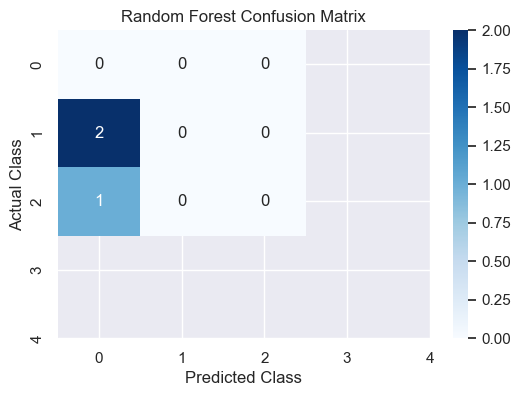

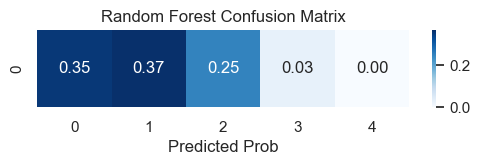

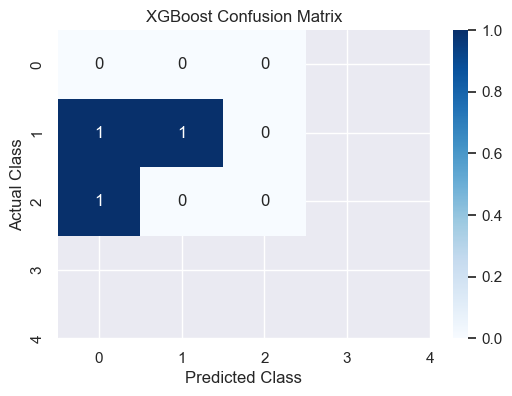

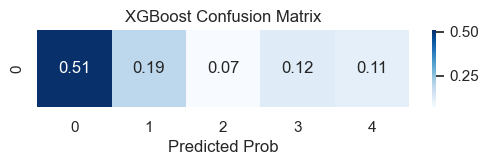

In [54]:
train_size = int(len(X) * 0.9)

X_train, y_train = X.iloc[:train_size], y.iloc[:train_size]
X_test, y_test = X.iloc[train_size:], y.iloc[train_size:]
#results = {}
for name, model in models.items():
    # Define the pipeline
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = model_pipeline.predict(X_test)
    pred= model_pipeline.predict_proba(df_home_frw)

    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    plt.figure(figsize=(6,1))
    sns.heatmap(pred, annot=True, fmt='.2f', cmap='Blues', xticklabels=labels)
    plt.xlabel("Predicted Prob")
    plt.ylabel("")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    # Evaluate performance
    

### Model vs Home

In [55]:
target = "GAC"  # Goals For

# Separate features and target
X = df_home_ga.drop(columns=[target])
y = df_home_ga[target]
categorical_features = ["H/A"]  # Home/Away column
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()


In [56]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

In [57]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, objective='multi:softmax', 
                             num_class=6, eval_metric='mlogloss', random_state=42),
   # "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
   # "Linear Regression": LinearRegression()
}

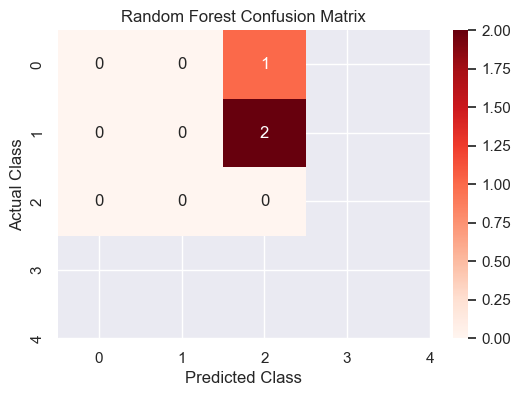

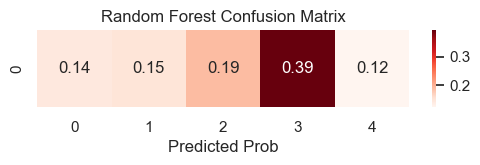

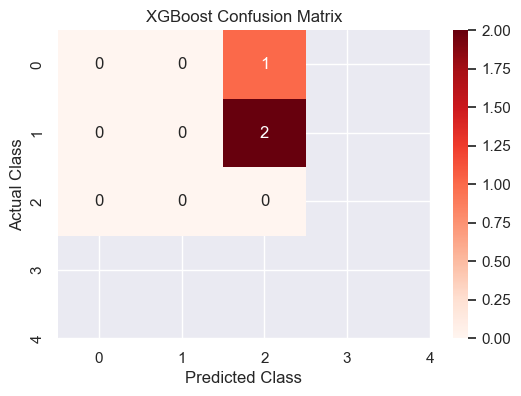

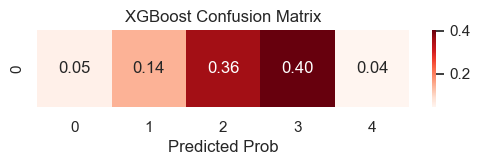

In [58]:
train_size = int(len(X) * 0.9)

X_train, y_train = X.iloc[:train_size], y.iloc[:train_size]
X_test, y_test = X.iloc[train_size:], y.iloc[train_size:]
#results = {}
for name, model in models.items():
    # Define the pipeline
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = model_pipeline.predict(X_test)
    pred= model_pipeline.predict_proba(df_home_bcw)

    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    plt.figure(figsize=(6,1))
    sns.heatmap(pred, annot=True, fmt='.2f', cmap='Reds', xticklabels=labels)
    plt.xlabel("Predicted Prob")
    plt.ylabel("")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    # Evaluate performance
    

### Model Away

In [59]:
target = "GFC"  # Goals For

# Separate features and target
X = df_away_gf.drop(columns=[target])
y = df_away_gf[target]
categorical_features = ["H/A"]  # Home/Away column
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()


In [60]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

In [61]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, objective='multi:softmax', 
                             num_class=6, eval_metric='mlogloss', random_state=42),
   # "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
   # "Linear Regression": LinearRegression()
}

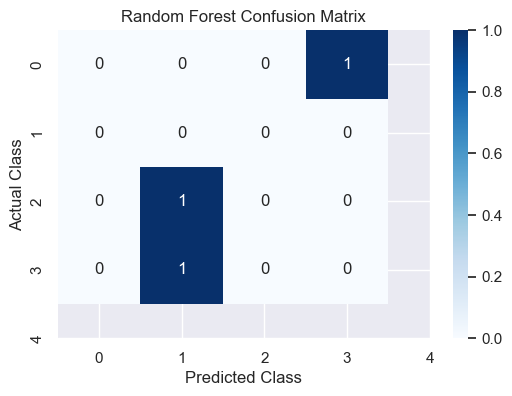

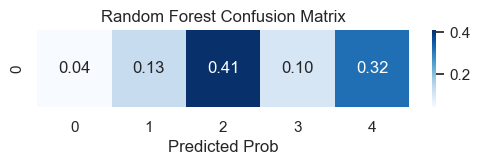

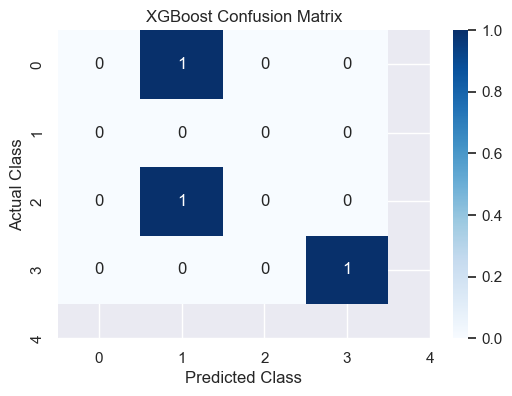

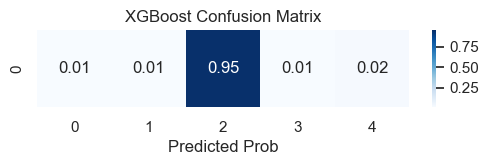

In [62]:
train_size = int(len(X) * 0.9)

X_train, y_train = X.iloc[:train_size], y.iloc[:train_size]
X_test, y_test = X.iloc[train_size:], y.iloc[train_size:]
#results = {}
for name, model in models.items():
    # Define the pipeline
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = model_pipeline.predict(X_test)
    pred= model_pipeline.predict_proba(df_away_frw)

    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    plt.figure(figsize=(6,1))
    sns.heatmap(pred, annot=True, fmt='.2f', cmap='Blues', xticklabels=labels)
    plt.xlabel("Predicted Prob")
    plt.ylabel("")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    # Evaluate performance
    

### Model vs Away

In [63]:
target = "GAC"  # Goals For

# Separate features and target
X = df_away_ga.drop(columns=[target])
y = df_away_ga[target]
categorical_features = ["H/A"]  # Home/Away column
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()


In [64]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

In [65]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, objective='multi:softmax', 
                             num_class=6, eval_metric='mlogloss', random_state=42),
   # "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
   # "Linear Regression": LinearRegression()
}

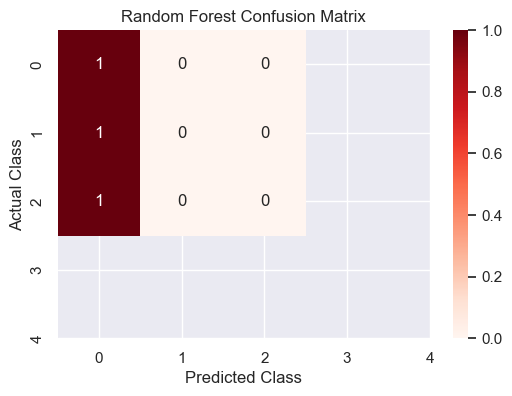

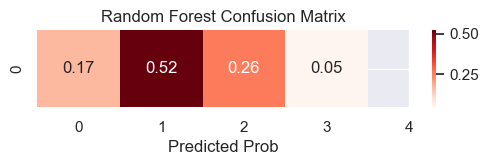

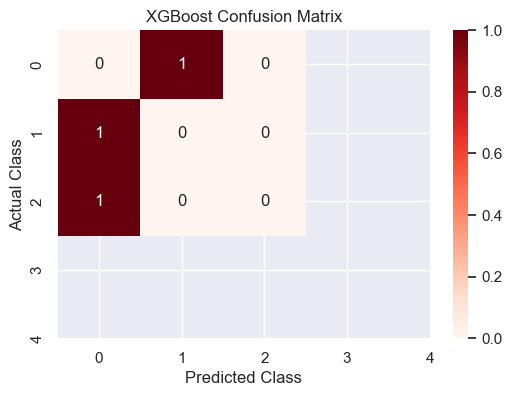

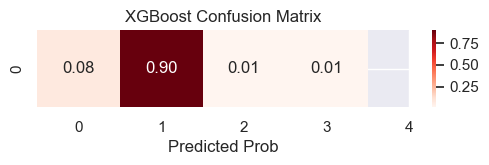

In [66]:
train_size = int(len(X) * 0.9)

X_train, y_train = X.iloc[:train_size], y.iloc[:train_size]
X_test, y_test = X.iloc[train_size:], y.iloc[train_size:]
#results = {}
for name, model in models.items():
    # Define the pipeline
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = model_pipeline.predict(X_test)
    pred= model_pipeline.predict_proba(df_away_bcw)

    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    plt.figure(figsize=(6,1))
    sns.heatmap(pred, annot=True, fmt='.2f', cmap='Reds', xticklabels=labels)
    plt.xlabel("Predicted Prob")
    plt.ylabel("")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    # Evaluate performance
    

## Regression

### Model Home

In [67]:
target = "Tm_PTS"  # Goals For

# Separate features and target
X = df_home_gf.drop(columns=[target])
y = df_home_gf[target]
categorical_features = ["H/A"]  # Home/Away column
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()


In [68]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

In [69]:
model_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_estimators=20, random_state=25))
])

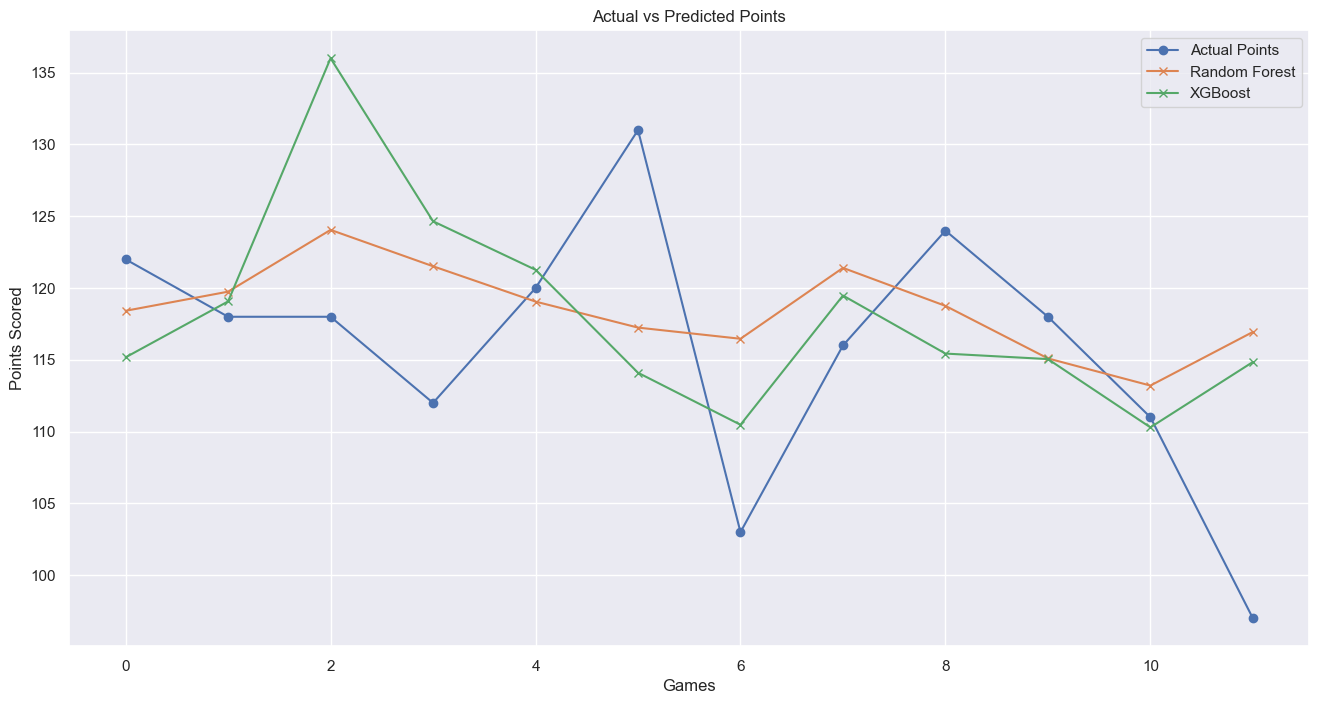

In [85]:
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
   # "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
   # "Linear Regression": LinearRegression()
}

# Split into training and testing sets
train_size = int(len(X) * 0.8)

X_train, y_train = X.iloc[:train_size], y.iloc[:train_size]
X_test, y_test = X.iloc[train_size:], y.iloc[train_size:]
# Train and evaluate each model
results = {}
plt.figure(figsize=(16,8))
plt.plot(y_test.values, label='Actual Points', marker='o')
for name, model in models.items():
    # Define the pipeline
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = model_pipeline.predict(X_test)
    plt.plot(y_pred, label=name, marker='x')
    
    # Evaluate performance
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    pred= model_pipeline.predict(df_home_frw)
    
    results[name] = {"MAE": mae, "RMSE": rmse, "PRED": pred[0]}

# Convert results to a DataFrame and display
results_df = pd.DataFrame(results).T
plt.legend()
plt.title("Actual vs Predicted Points")
plt.xlabel("Games")
plt.ylabel("Points Scored")
plt.show()

In [80]:
results_df

,MAE,RMSE,PRED
Random Forest,7.063876,9.047376,117.443289
XGBoost,8.145854,10.362132,118.500099


### Model vs Home

In [48]:
target = "Opp_PTS"  # Goals For

# Separate features and target
X = df_home_ga.drop(columns=[target])
y = df_home_ga[target]
categorical_features = ["H/A"]  # Home/Away column
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()


In [49]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

In [50]:
model_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_estimators=20, random_state=25))
])

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=25)

# Train the model
model_pipeline.fit(X_train, y_train)

# Predictions
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")


MAE: 13.425
RMSE: 14.329


In [52]:
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression()
}

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=25)

# Train and evaluate each model
results = {}
for name, model in models.items():
    # Define the pipeline
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = model_pipeline.predict(X_test)
    
    # Evaluate performance
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    pred= model_pipeline.predict(df_home_bcw)
    
    results[name] = {"MAE": mae, "RMSE": rmse, "PRED": pred}

# Convert results to a DataFrame and display
results_df = pd.DataFrame(results).T

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000991 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6818
[LightGBM] [Info] Number of data points in the train set: 52, number of used features: 405
[LightGBM] [Info] Start training from score 108.211538
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [53]:
results_df

,MAE,RMSE,PRED
Random Forest,13.041667,13.840622,[108.75]
XGBoost,13.151134,15.03493,[113.32865]
LightGBM,16.852781,18.445559,[102.71760442340414]
Linear Regression,24.528301,25.202121,[84.73789959470245]


### Model Away

In [54]:
target = "Tm_PTS"  # Goals For

# Separate features and target
X = df_away_gf.drop(columns=[target])
y = df_away_gf[target]
categorical_features = ["H/A"]  # Home/Away column
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()


In [55]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

In [57]:
model_pipeline2 = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_estimators=20, random_state=25))
])

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=25)

# Train the model
model_pipeline2.fit(X_train, y_train)

# Predictions
y_pred = model_pipeline2.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")


MAE: 12.708
RMSE: 14.490


In [59]:
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression()
}

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=25)

# Train and evaluate each model
results = {}
for name, model in models.items():
    # Define the pipeline
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = model_pipeline.predict(X_test)
    
    # Evaluate performance
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    pred= model_pipeline.predict(df_away_frw)
    
    results[name] = {"MAE": mae, "RMSE": rmse, "PRED": pred}

# Convert results to a DataFrame and display
results_df = pd.DataFrame(results).T

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000461 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6654
[LightGBM] [Info] Number of data points in the train set: 51, number of used features: 405
[LightGBM] [Info] Start training from score 121.941176
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [60]:
results_df

,MAE,RMSE,PRED
Random Forest,14.915,16.475376,[120.74]
XGBoost,12.521159,13.834184,[121.489395]
LightGBM,13.837515,17.031631,[126.221659266553]
Linear Regression,14.006226,16.370987,[137.60611314295068]


### Model vs Away

In [61]:
target = "Opp_PTS"  # Goals For

# Separate features and target
X = df_away_ga.drop(columns=[target])
y = df_away_ga[target]
categorical_features = ["H/A"]  # Home/Away column
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()


In [62]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

In [63]:
model_pipeline2 = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_estimators=20, random_state=25))
])

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=25)

# Train the model
model_pipeline2.fit(X_train, y_train)

# Predictions
y_pred = model_pipeline2.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")


MAE: 10.350
RMSE: 11.309


In [65]:
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression()
}

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=25)

# Train and evaluate each model
results = {}
for name, model in models.items():
    # Define the pipeline
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = model_pipeline.predict(X_test)
    
    # Evaluate performance
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    pred= model_pipeline.predict(df_away_bcw)
    
    results[name] = {"MAE": mae, "RMSE": rmse, "PRED": pred}

# Convert results to a DataFrame and display
results_df = pd.DataFrame(results).T

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000408 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6692
[LightGBM] [Info] Number of data points in the train set: 51, number of used features: 405
[LightGBM] [Info] Start training from score 110.666667
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [66]:
results_df

,MAE,RMSE,PRED
Random Forest,11.596667,12.906048,[108.99]
XGBoost,15.120514,16.820382,[102.5551]
LightGBM,9.838286,11.897321,[109.56588285586935]
Linear Regression,14.973625,19.146221,[86.82162740707135]
